# Unsupervised machine learning

* No training data (no class labels)
* Context is generally some type of clustering or grouping of data
* We consider a parameter $k$ which denotes the number of (suspected) clusters or generative functions

## Applications

* Collaborative filtering
* Clustering, decompositions
* Imputation of missing data
* Dimension reduction (SVD, NNMF)

## Types of clustering methods

* Hard clustering: clusters do not overlap
    * Each point a member of exactly one cluster
* Soft clustering: clusters may overlap
    * Often generative, probabilistic models

### Expectation-maximisation (E-M)

1. E-step:
    * Compute for each point the probability of being generated by one of the $k$ ($h$ in figures below) components
2. M-step:
    * Update parameters to maximise the likelihood of the data given those assignments

![E-step](mixGaussEStep.png) ![M-step](mixGaussMStep.png)

* [E-M: How it works (video)](https://www.youtube.com/watch?v=REypj2sy_5U)
* [E-M: Example using coin tosses (video)](https://www.youtube.com/watch?v=7e65vXZEv5Q)
* [Expectation-Maximization for Gaussian Mixtures in Python](https://mattdickenson.com/2016/06/06/expectation-maximization-gaussian/)

Figures from [Computer Vision:  Models, Learning, and Inference. Simon J.D. Prince, 2012.](http://www.computervisionmodels.com/)

## Methods

### K-means clustering

1. Pick $k$ random cluster centres
2. Repeat until converged
   * E-step: Assign points to the nearest cluster centre
   * M-step: Set the cluster centres to be the mean of the assigned points


From: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

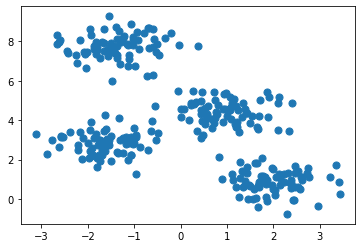

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

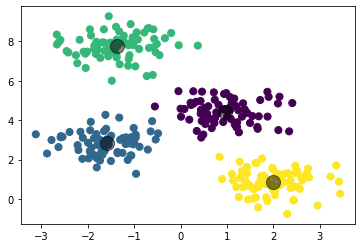

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

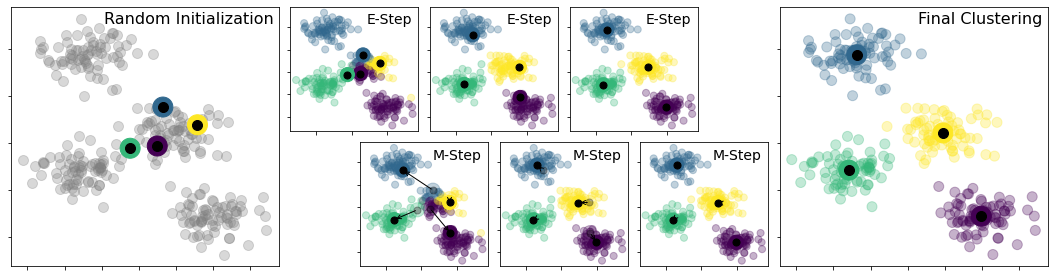

In [9]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


fig.savefig('05.11-expectation-maximization.png')

k-means example on text documents (20 newsgroups): http://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

### Spectral clustering

scikit-learn docs: http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

1. Low-dimensional embedding of data
2. K-means in low-dimensional space

Demo: http://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html#sphx-glr-auto-examples-cluster-plot-segmentation-toy-py

### Gaussian mixture models (GMM)

scikit-learn docs: http://scikit-learn.org/stable/modules/mixture.html

* Labels for instances known
    1. Estimate the mean
    2. Estimate the variance
* Labels for instances unknown
    * Suspect there are $k$ sources (Gaussian)
    * If we know the parameters of the Gaussians, we can make some inferences about the datapoints
    * If we know the labels of the datapoints, we can make some inferences about the parameters of the Gaussians ;)
    
We use expectation maximisation (E-M) (see above).
    
GMMs are a a generalisation of k-means where estimations of covariances are included (not just cluster centres).

See for a good example: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

### DBSCAN

scikit-learn demo: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

* Automatic selection of $k$ (number of clusters)
* Clusters as areas of high-density separated by areas of low-density

### Singular value decomposition

scikit-learn docs: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

* Factorise the feature matrix $X \approx U*\Sigma*V'$
* Columns of U, V are left- and right-singular vectors, respectively
* Several options after factorisation:
    1. Truncate $\Sigma$ at $k$, yielding a reduced dimensional space $U_k*\Sigma_k*V_k'$
    2. Data imputation: truncated SVD also fills in missing values
    3. Examine $U$ or $V'$ for feature-topics and topic-instances

SVD topics $U$, $V'$ are difficult to interpret (negative values), so NNMF can be used if this is important.

### Non-negative matrix factorisation (NNMF)

* Factorise the feature matrix $X = WH$
* Inherent clustering of columns of $X$ in $H$ where $H_{kj}$ denotes soft membership of instance $x_j$ to cluster $k$

All elements of $W,H$ are >= 0.

See this Jupyter Notebook about [NNMF using Tensorflow](https://nipunbatra.github.io/blog/2017/nnmf-tensorflow.html).

## Evaluation

http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

Great! We've clustered our data or fit our data to a generative model, is it any good?

We want to evaluate the quality of the clusters. This evaluation generally looks at inter-cluster and intra-cluster distances.

### Silhouette coefficient (SC)

scikit-learn docs: http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

Simple measure for a hard clustering like k-means. A higher SC means better clusters.

Composed of two scores:
* a - Mean distance between a sample and all other points in the same class
* b - Mean distance between a sample and all other points in the *next nearest* cluster

$sc = \frac{b - a}{max(a, b)}$

### Held-out data (imputation)

Treat a part of the data as test data (20-25%).

1. Build model on training data
2. See if the model predicts the test data (use an appropriate error metric)

### Evaluation on later models (e.g., classification)

Here we assume the unsupervised learning is used to reduce dimensionality or noise before the data is sent to a classifier. In this case we can adjust parameters of the unsupervised model (e.g., $k$), and evaluate on the performance of the classifier, while keeping classifier parameters fixed.

# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.